Colab Link: https://drive.google.com/file/d/1Lx5kEaRpVgl-jvYOngLmonZPsGbpyv-o/view?usp=share_link 

# Flight Delay Prediction
##### Cohort B Team 7 members: Guang(Jacky) Yang, Zhemang(Mia) Zhong, Sheng(Johnny) Zhou, Tzu Ching(Charlie) Chou 

## Table Of Contents
**1. Problem Statement and  Objective**

**3. Data Description**

**4. Data Cleaning and Prepocessing**

**5. Exploratory Data Analysis**

*   Target Variable
*   Categorcial Variables
*   Numercial Variables

**6. Model Development**

*   DecisionTreeClassifier 
*   Build a Pipeline
*   RandomForestClassifier
*   KNeighborsClassifier
*   Support Vector Classification
*   XGBoostClassifier

**7. Model Evaluation**

*   RandomizedSearchCV with XGBClassifier(Hyperparameter tuning)
*   Confusion Matrix

**8. Conclusion**

**9. Reference**



## 1. Problem Statement and Objective
Flight delays have become an important subject and problem for air transportation systems all over the world. The aviation industry is continuing to suffer from economic losses associated with flight delays all the time. According to data from the Bureau of Transportation Statistics (BTS) of the United States, more than 20% of U.S. flights were delayed in 2018. These flight delays have a severe economic impact in the U.S. which is equivalent to 40.7 billion dollars per year.

Passengers suffer a loss of time and missed business opportunities or leisure activities, and airlines attempting to make up for delays leads to extra fuel consumption and a larger adverse environmental impact. In order to alleviate the negative economic and environmental impacts caused by unexpected flight delays, and balance increasing flight demand with growing flight delays, an accurate prediction of flight delays in airports is needed.

Reasons for Airport delays may result from airline operations, air traffic congestion, weather, air traffic management initiatives, etc. Most of the reasons are stochastic phenomena that are difficult to predict timely and accurate. So it is important for us to utilize machine learning to help us to predict the delay of airlines.

Thus, we aim to use several Machine Learning techniques to predict whether the flight will be delayed or not. Out of all the ML algorithms that we use, we will find the best model to perform hyperparameter tuning and increase its accuracy.


## 3. Data Description

Dataset Source : https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay - 539383 instances and 8 different features


* `id`: Serial No
* `Airline`: Different types of commercial airlines
* `Flight`: Types of Aircraft
* `AirportFrom`: Source Airport
* `AirportTo`: Destination Airport
* `DayOfWeek`: The Day of Week
* `Time`: Departure time measured in minutes from midnight (the range is 10-1439)
* `Length`: Duration of the flight in minutes
* `Delay`(Target Variable): Whether the flight is delayed or not.(1 - Delayed, 0 - On Time)

`Time`, `Length` should be treated as numeric variables since these variables all contain values in terms of numbers rather than natural language descriptions. The reason we treat `Flight` as numercial variable is that even though it could be stored in groups, however, it contains too many groups for us to perform effecient ML algorithms and we cannot acquire clear information regarding this variable, thus it would be best for us to treat it as int.

`Airline`,, `AirportFrom`, `AirportTo`, `DayofWeek` should be treated as categorical variables because these variables can obviously be stored in groups or categories.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/810/BA810/'
df = pd.read_csv(data_folder+'Airlines.csv')

Mounted at /content/drive


In [ ]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
df.shape

(539383, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [ ]:
df[['Time','Length','Delay']].corr() #numercial + binary

,Time,Length,Delay
Time,1.000000,-0.020612,0.150454
Length,-0.020612,1.000000,0.040489
Delay,0.150454,0.040489,1.000000


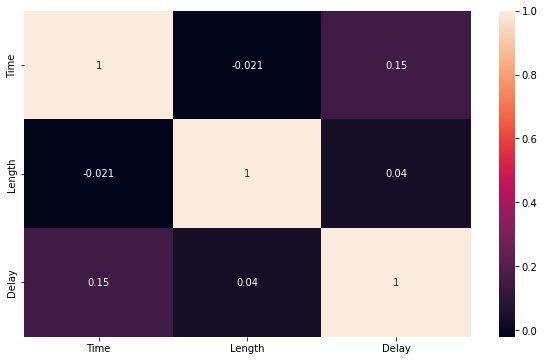

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df[['Time','Length','Delay']].corr(), annot=True, ax = ax)
plt.show()

## 4. Data Cleaning and Prepocessing

There are no missing values in our dataset, as well as no duplicated rows. The reason we did not convert `Delay` to object is for generate visualization analysis later.

In [ ]:
#convert dtype

#df["Delay"]= df["Delay"].astype(str)
df["DayOfWeek"]= df["DayOfWeek"].astype(str)
df.drop(['id'], axis=1, inplace=True) # drop unuseful 'id' column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  object
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 32.9+ MB


In [ ]:
df.isna().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

## 5. Exploratory Data Analysis

#### Target Variable

We have a relatively balanced target variable

In [ ]:
df[df['Delay'] == 0].shape[0] / df.shape[0]

0.5545577076029463

In [ ]:
df[df['Delay'] == 1].shape[0] / df.shape[0]

0.4454422923970537

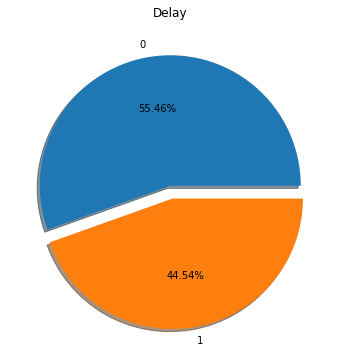

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.Delay.value_counts(), explode=[0,0.1], autopct='%1.2f%%',shadow=True,labels=[0,1])
plt.title("Delay")
plt.show()

#### Categorical Variables

**a. `Delay` vs. `DayOfWeek`**

The plot below shows Wednesday, Thursday and Friday have the most flights and most delayed flights. However, when considering the delay ratio on different days of the week, most of them are similar, Wednesday and Monday reach a higher delay ratio(around 0.47 and 0.46 respectively), while on Saturday and Friday fewer flights are delayed (around 0.40 and 0.42 respectively). Therefore, generally speaking, the day of the week has little influence on flight delay.

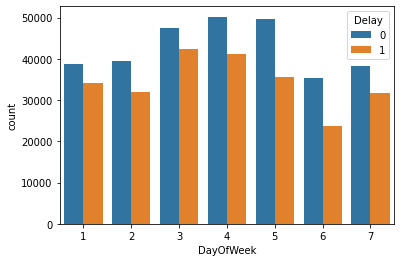

In [ ]:
ax = sns.countplot(x="DayOfWeek", hue='Delay',data=df, order = ['1','2','3','4','5','6','7'])

In [ ]:
#plot total delay ratio of each dayofweek
sns.set(rc={"figure.figsize":(10, 6)}) 
plt.tight_layout()

df1 = df[['DayOfWeek','Delay']].groupby('DayOfWeek').agg(TotalFlight=('Delay', 'count')) # total flight of each day
df2 = df[['DayOfWeek','Delay']].groupby('DayOfWeek').agg(TotalDelay=('Delay', 'sum'))## total delay of each day 
df_merged = df1.merge(df2, on='DayOfWeek')
df_merged['DelayRatio'] = (df_merged['TotalDelay'] / df_merged['TotalFlight'])
dt_df = df_merged.sort_values('DelayRatio',ascending = False).reset_index()
fig = px.bar(dt_df, x='DayOfWeek', y='DelayRatio',color='DelayRatio')
fig.show()

<Figure size 720x432 with 0 Axes>

**b. `Delay` vs. `Airline`**

The plots present that the Airline WN(Southwest Airline) has the most flight delay, which is more than 65000 in total, and its delay ratio is also the highest ( around 70% of flights in WN could be delayed). Another airline that has more than half of the flights that could be delayed is Airline CO(Continental Airline), which, however, has much fewer flights in total than most other airlines.

While the delay ratio of airlines YV, OH, and FL are the lowest, around only 25%, 28%, and 30% of flights could be delayed respectively. So, for individuals, choosing airlines YV, OH or FL could be a better choice for keeping plans without delay of flights, and for business ( airline companies), airlines WN and CO should improve their operations and procedures for keeping more flights on time.

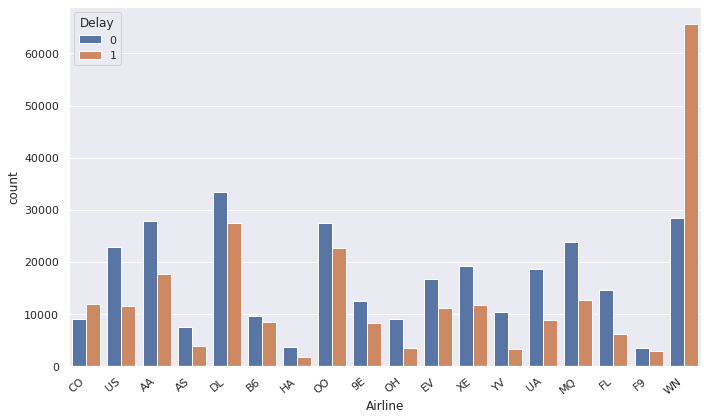

In [ ]:
ax = sns.countplot(x="Airline", hue='Delay',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#plot delay ratio of each airline
df5 = df[['Airline','Delay']].groupby('Airline').agg(TotalFlight=('Delay', 'count')) 
df6 = df[['Airline','Delay']].groupby('Airline').agg(TotalDelay=('Delay', 'sum'))
df_merged3=df5.merge(df6, on='Airline')
df_merged3['DelayRatio']=df_merged3['TotalDelay']/df_merged3['TotalFlight']
dtaa = df_merged3.sort_values('DelayRatio',ascending = False).reset_index()
fig = px.bar(dtaa, x='Airline', y='DelayRatio',color='DelayRatio')
fig.show()

**c. `Delay` vs. `AirportFrom`**

The flights departing from the airports MDW(Chicago Midway International Airport), DAL(Dallas Love Field Airport), and OAK(Oakland International Airport,) reach the highest delay ratio level, in which higher than 70% of flights could be delayed. The flights which depart from airports HTS(Tri-State Airport), FLG(Flagstaff Pulliam Airport), and TXK(Texarkana Regional Airport) are more likely to be punctual, less than 13% of flights departing from these airports are delayed.

We believe the reason for this is that MDW and OAK are international airports that are always busy and have a lot more flights, on the other hand, HTS and FLG, etc. are small airports and usually do not have tons of flights.

In [ ]:
#plot delay ratio of each starting point airport
df3 = df[['AirportFrom','Delay']].groupby('AirportFrom').agg(TotalFlight=('Delay', 'count')) 
df4 = df[['AirportFrom','Delay']].groupby('AirportFrom').agg(TotalDelay=('Delay', 'sum'))
df_merged2=df3.merge(df4, on='AirportFrom')
df_merged2['DelayRatio']=df_merged2['TotalDelay']/df_merged2['TotalFlight']
dta = df_merged2.sort_values('DelayRatio',ascending = False).reset_index()
fig = px.bar(dta, x='AirportFrom', y='DelayRatio',color='DelayRatio')
fig.show()

In [ ]:
dta.head(10)

,AirportFrom,TotalFlight,TotalDelay,DelayRatio
0,MDW,7103,5222,0.735182
1,DAL,3838,2748,0.715998
2,OAK,3783,2697,0.712926
3,HOU,4420,2949,0.667195
4,OTH,93,59,0.634409
5,FLO,18,11,0.611111
6,SMF,3504,2123,0.605879
7,GUM,10,6,0.600000
8,SJC,3357,1971,0.587131
9,LWS,57,33,0.578947


#### Numercial Variables

**a. `Delay` vs. `Time`**

`Time` here means the departure time of the flight which is measured in minutes from midnight (in fact the range is 10-1439). Before 300 minutes, which means 5 am here, basically speaking, there are few flight departures. From 350 to 600 minutes, which means between 6 am to 10 am, most of the flights could depart on time and the delay ratio of flights during that time are on a lower level. However, after 2 pm, the orange line goes up and even exceeds the blue line, which means during that time, more than 50% of the flights could be delayed. After 6 pm, the number of flights decreases gradually, along with the fewer and fewer either delayed or not delayed flights.

Thus, generally speaking, if passengers do not want their flights delayed, it would be best for them to travel from 5am to 10am.

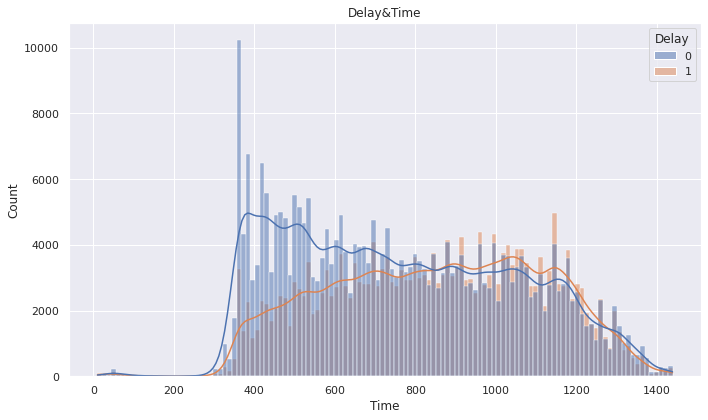

In [ ]:
ax = sns.histplot(x="Time", hue='Delay',data=df,kde=True).set(title='Delay&Time')
sns.set(rc={"figure.figsize":(10, 6)}) 
plt.tight_layout()
plt.show()

**a. `Delay` vs. `Length`**

To some extent, the blue line and the orange line show basically the same trend. Most flights’ lengths are between 50 minutes and 200 minutes, which also reach a lower level of delay ratio. Flights longer than 200 minutes always have around a 50% possibility of delay by noticing that the blue and orange lines are almost overlapping.

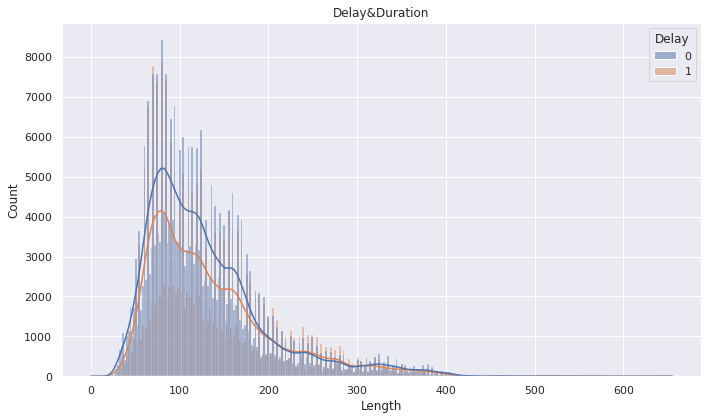

In [ ]:
ax = sns.histplot(x="Length", hue='Delay',data=df,kde=True).set(title='Delay&Duration')
sns.set(rc={"figure.figsize":(10, 6)}) 
plt.tight_layout()
plt.show()

## 6.Model Development

We prepared two pipelines to preprocess our numerical and categorical features with standard scaler to standardize numerical features, one-hot-encoder to turn categorical features into columns with binary values, and simple imputer to impute any missing values with mode.

We chose `DecisionTree`,`RandomForest` , `KNN`,, `SVC` and `XGBoost` as our model candidates.
For XGBoost, it has many powerful built-in functions. Such as Lasso Regression and Ridge Regression to prevent the model from overfitting. It also has the capability to handle missing values. Even though we have already dealt with missing values, this function can still be a reference. 

For `DecisionTreeClassifier` specifically, we do not prepare pipeline for it since it is powerful enough to handle categorical variables and handle missing values itself. 

Since we have a huge dataset with more than 530000+ rows and after one-hot-encoder we would have numerous columns, in order to be efficient with our ML models, we randomly choose 10% sample out of the dataset and compares these model on the 10% sample and choose the best-performed model. The same reason we did not use GridSearch since RandomSearch is much faster. We also drop `AirportTo` varibale since Destination Airport does not have much to do with flight status. 

Last but not least, XGBoostClassifier performs the best, then we perform Hyperparameter Tuning with Random Search to find the best param for XGB in order to increase the accuracy and better predict our target variable.



In [ ]:
df.drop(['AirportTo'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   DayOfWeek    539383 non-null  object
 4   Time         539383 non-null  int64 
 5   Length       539383 non-null  int64 
 6   Delay        539383 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.8+ MB


In order to be efficient of running all the models, we use `dfsample` which contain 10% of the whole dataset. 

In [ ]:
dfsample = df.sample(frac=0.1, random_state =42)

In [ ]:
dfsample.shape

(53938, 7)

In [ ]:
dfsample.head()

,Airline,Flight,AirportFrom,DayOfWeek,Time,Length,Delay
442150,OO,6477,SMF,7,881,85,1
229730,UA,310,DEN,2,665,223,1
69994,WN,1739,OAK,7,465,85,1
414293,B6,1085,JFK,5,990,131,0
171704,AS,129,SEA,5,1150,235,1


In [ ]:
dfsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53938 entries, 442150 to 244736
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      53938 non-null  object
 1   Flight       53938 non-null  int64 
 2   AirportFrom  53938 non-null  object
 3   DayOfWeek    53938 non-null  object
 4   Time         53938 non-null  int64 
 5   Length       53938 non-null  int64 
 6   Delay        53938 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.3+ MB


DecisionTreeClassifier(without using the Pipeline)

In [ ]:
dfsample2 = pd.get_dummies(dfsample, columns = ['Airline','AirportFrom','DayOfWeek'])

In [ ]:
dfsample2.head()

,Flight,Time,Length,Delay,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,AirportFrom_XNA,AirportFrom_YAK,AirportFrom_YUM,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
442150,6477,881,85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
229730,310,665,223,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
69994,1739,465,85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414293,1085,990,131,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
171704,129,1150,235,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = dfsample2.drop('Delay', axis=1) # separate X ...
y = dfsample2['Delay'].copy()       # from y
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .25, random_state=0) #split all
train_X.shape, test_X.shape, train_y.shape, test_y.shape # check sizes

((40453, 319), (13485, 319), (40453,), (13485,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3) # maximum of three layers after root (layer 0).
clf.fit(train_X, train_y)
#plt.figure(dpi=300) # Makes the figure a little larger, easier to read.
#plot_tree(clf, filled=True, feature_names=list(train_X.columns)); # graphically shows the tree

DecisionTreeClassifier(max_depth=3)

According to the decision tree graph, if the passenger does not wish their flight to be delayed, it would be best for them to avoid “Airline_WN”(SouthWest AL), and if the flight departs before 10 40am(641.6 mins), it is more likely that the flight will be on time, Moreover, if the flight departs even earlier before 8:25am(505.5 mins), it will further increase the chance of the flight will be on time.

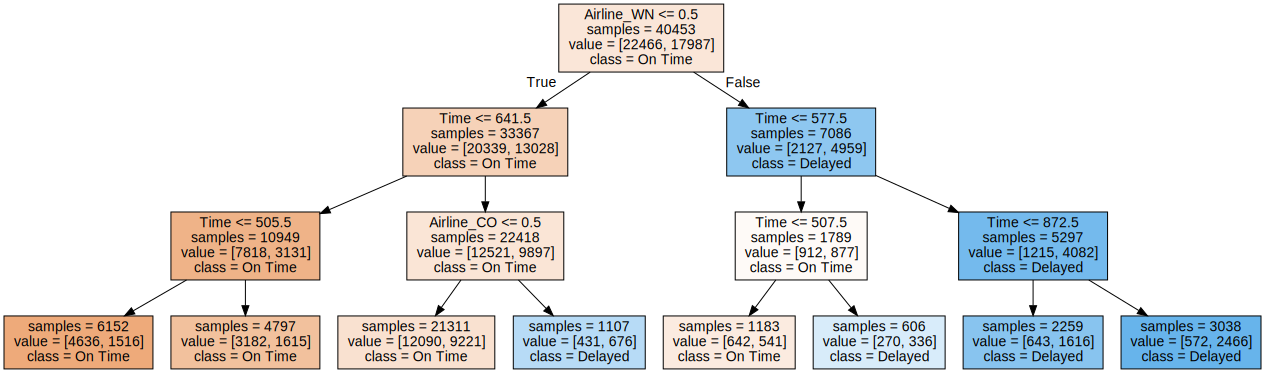

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="decision_tree.dot", class_names=["On Time", "Delayed"], impurity=False, filled=True,feature_names=list(train_X.columns))
import graphviz
with open("decision_tree.dot") as f:
    dot_graph = f.read()
dti=graphviz.Source(dot_graph)
dti.format = "png"
dti.render("Decision Tree")
dti

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score
y_pred1 = clf.predict(test_X)
print("The accuracy score is {}".format(accuracy_score( test_y, y_pred1)))
print("The balanced accuracy score is {}".format(balanced_accuracy_score( test_y, y_pred1).round(4)))  # to see how does the RF Classifer perform before hyperparameter tuning.

The accuracy score is 0.639302929180571
The balanced accuracy score is 0.6021


In [ ]:
from sklearn.model_selection import cross_val_score
dt_scores = cross_val_score(clf, train_X, train_y, cv=3, scoring='balanced_accuracy')
dt_scores.mean().round(4)

0.5971

After processing the Decision Tree, we first set up Pipeline to process Numerical Features and Categorical Features. For Numerical Features, we use SImple-imputer to impute missing values by the median of each column in which the missing values are located. And use standardScaler to do normalization by removing the mean of  Numerical Features and scaling each feature unit variance. For Categorical Features, we use SImple-imputer to impute missing values by the most frequent of each column. And in the end, we use onehotencoder to transform the categorical features into numerical dummy features,  its useful for training our machine learning models. 

Building the Pipeline

In [ ]:
#build our preprocessing pipelines, for numerical attributes:standardize the numeric attributes using StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


set_config(display='diagram') # shows the pipeline structure graphically

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
#for the categorical attributes: expand the categorical attributes to columns of 0/1 variables using OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

num_attribs = ["Time","Length",	"Flight"]
cat_attribs = ["Airline","AirportFrom","DayOfWeek"]

# The following step patches SimpleImputer to produce feature names
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([ # handle each type of column with appropriate pipeline
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Time', 'Length', 'Flight']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 ['Airline', 'AirportFrom', 'DayOfWeek'])])

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dfsample, test_size = .25, random_state=0)

train_data.shape, test_data.shape

((40453, 7), (13485, 7))

In [ ]:
dfsample_X = train_data.drop("Delay", axis=1)
dfsample_y = train_data["Delay"]
print(dfsample_X.head())  # to check that 'y' isn't included

X_train = preprocess_pipeline.fit_transform(dfsample_X)
y_train = dfsample_y.values
preprocess_pipeline.get_feature_names_out() # check the column names produced by the pipeline

       Airline  Flight AirportFrom DayOfWeek  Time  Length
439543      B6     301         IAD         7   740     339
420051      OO    6404         SFO         6   515      92
242506      UA     944         LAX         3   424     241
84413       XE    2999         CLE         7  1260      77
310367      EV    5053         ATL         6  1245      69


array(['num__Time', 'num__Length', 'num__Flight', 'cat__Airline_9E',
       'cat__Airline_AA', 'cat__Airline_AS', 'cat__Airline_B6',
       'cat__Airline_CO', 'cat__Airline_DL', 'cat__Airline_EV',
       'cat__Airline_F9', 'cat__Airline_FL', 'cat__Airline_HA',
       'cat__Airline_MQ', 'cat__Airline_OH', 'cat__Airline_OO',
       'cat__Airline_UA', 'cat__Airline_US', 'cat__Airline_WN',
       'cat__Airline_XE', 'cat__Airline_YV', 'cat__AirportFrom_ABE',
       'cat__AirportFrom_ABI', 'cat__AirportFrom_ABQ',
       'cat__AirportFrom_ABY', 'cat__AirportFrom_ACT',
       'cat__AirportFrom_ACV', 'cat__AirportFrom_ACY',
       'cat__AirportFrom_ADK', 'cat__AirportFrom_ADQ',
       'cat__AirportFrom_AEX', 'cat__AirportFrom_AGS',
       'cat__AirportFrom_ALB', 'cat__AirportFrom_AMA',
       'cat__AirportFrom_ANC', 'cat__AirportFrom_ASE',
       'cat__AirportFrom_ATL', 'cat__AirportFrom_ATW',
       'cat__AirportFrom_AUS', 'cat__AirportFrom_AVL',
       'cat__AirportFrom_AVP', 'cat__AirportFro

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='balanced_accuracy')
rf_scores.mean().round(4)

0.6193

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_pipe = KNeighborsClassifier()
knn_scores = cross_val_score(knn_pipe, X_train, y_train, cv=3, scoring='balanced_accuracy')
knn_scores.mean().round(4)

0.6073

SVC

In [ ]:
from sklearn.svm import SVC

svc_pipe =  SVC(gamma="auto")
svc_scores = cross_val_score(svc_pipe, X_train, y_train, cv=3, scoring='balanced_accuracy')
svc_scores.mean().round(4)

0.5962

Log Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=3, scoring='balanced_accuracy')
logreg_scores.mean().round(4)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.8/dist-packages/sklearn/lin

0.6259

XGBoost

In [ ]:
import xgboost
XGB_classifier = xgboost.XGBClassifier(booster = "gbtree")
XGB_classifier.fit(X_train,y_train)

XGBClassifier()

In [ ]:
xgb_score=cross_val_score(XGB_classifier,X_train,y_train,cv=3)
print(xgb_score.mean().round(4))

0.6435


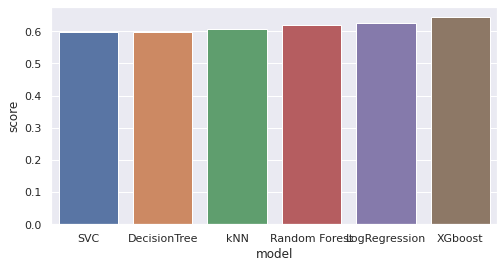

In [ ]:
plt.figure(figsize=(8, 4))

data = [['XGboost', xgb_score.mean().round(4)], ['kNN', knn_scores.mean().round(4)], ['Random Forest', rf_scores.mean().round(4)],['DecisionTree', dt_scores.mean().round(4)],['SVC', svc_scores.mean().round(4)],['LogRegression',logreg_scores.mean().round(4)]]
df11 = pd.DataFrame(data, columns=['model', 'score'])
df11

sns.barplot(data=df11, x="model", y="score",order=df11.sort_values('score').model)

In [ ]:
df11.sort_values(by= "score", ascending=False,)

,model,score
0,XGboost,0.6435
5,LogRegression,0.6259
2,Random Forest,0.6193
1,kNN,0.6073
3,DecisionTree,0.5971
4,SVC,0.5962


We basically pick all models we learn from 810 class, there are[ ], and after running all of them, we made one Bar chart to show the score of different models. As we can see XGBoost has the highest score, which means it is the best model for our dataset. 

## 7. Model Evaluation

RandomizedSearchCV with XGBClassifier(hyperparameter tuning)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier(n_estimators = 200)

params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 1.5, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "reg_lambda": [2.1]
 
}

rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3, random_state = 42)
rs_model.fit(X_train,y_train)
rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5,
              min_child_weight=3, n_estimators=200, reg_lambda=2.1)

Before we run the model, we have to randomly split our dataset into 10% sample datasets. Because our dataset is too large and there are too many values, and also there will be more than 600 columns after using the one-hot encoder, which causes our computation to take a very long time. The first time we try the original data, It takes nearly an hour to run all the models. So we randomly pick 10% of sample data from our dataset to run our model.

In [ ]:
from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(df, test_size = .25, random_state=0)

train_data1.shape, test_data1.shape

((404537, 7), (134846, 7))

In [ ]:
df_X = train_data1.drop("Delay", axis=1)
df_y = train_data1["Delay"]
print(dfsample_X.head())  # to check that 'y' isn't included
df_X1 = test_data1.drop("Delay", axis=1)
df_y1 = test_data1["Delay"]

X_train = preprocess_pipeline.fit_transform(df_X)
y_train = df_y.values
X_test = preprocess_pipeline.fit_transform(df_X1)
y_test = df_y1.values
preprocess_pipeline.get_feature_names_out() # check the column names produced by the pipeline

       Airline  Flight AirportFrom DayOfWeek  Time  Length
439543      B6     301         IAD         7   740     339
420051      OO    6404         SFO         6   515      92
242506      UA     944         LAX         3   424     241
84413       XE    2999         CLE         7  1260      77
310367      EV    5053         ATL         6  1245      69


array(['num__Time', 'num__Length', 'num__Flight', 'cat__Airline_9E',
       'cat__Airline_AA', 'cat__Airline_AS', 'cat__Airline_B6',
       'cat__Airline_CO', 'cat__Airline_DL', 'cat__Airline_EV',
       'cat__Airline_F9', 'cat__Airline_FL', 'cat__Airline_HA',
       'cat__Airline_MQ', 'cat__Airline_OH', 'cat__Airline_OO',
       'cat__Airline_UA', 'cat__Airline_US', 'cat__Airline_WN',
       'cat__Airline_XE', 'cat__Airline_YV', 'cat__AirportFrom_ABE',
       'cat__AirportFrom_ABI', 'cat__AirportFrom_ABQ',
       'cat__AirportFrom_ABR', 'cat__AirportFrom_ABY',
       'cat__AirportFrom_ACT', 'cat__AirportFrom_ACV',
       'cat__AirportFrom_ACY', 'cat__AirportFrom_ADK',
       'cat__AirportFrom_ADQ', 'cat__AirportFrom_AEX',
       'cat__AirportFrom_AGS', 'cat__AirportFrom_ALB',
       'cat__AirportFrom_AMA', 'cat__AirportFrom_ANC',
       'cat__AirportFrom_ASE', 'cat__AirportFrom_ATL',
       'cat__AirportFrom_ATW', 'cat__AirportFrom_AUS',
       'cat__AirportFrom_AVL', 'cat__AirportFro

For hyper-parameter Turing part, We decide to use Random Search CV to find the best hyper-parameter because Random search is faster than grid search and should always be used when you have a large parameter space.  There is parameter space it’s large than in other models. Finally, after the random search, we find the best hyper-parameter for the xgboost model, and the accuracy is 66.3%. 

In [ ]:
XGB_classifier = xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5,
              min_child_weight=3, n_estimators=200, reg_lambda=2.1)
XGB_classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=5,
              min_child_weight=3, n_estimators=200, reg_lambda=2.1)

In [ ]:
preds = XGB_classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,preds)
print(f"Accuracy score is : % {100 * acc}")

Accuracy score is : % 66.30378357533779


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
conf_matrix = confusion_matrix(y_test,preds)
conf_matrix = pd.DataFrame(conf_matrix,columns = ["Positive","Negative"],index = ["Positive","Negative"])
conf_matrix

,Positive,Negative
Positive,60358,14618
Negative,30820,29050


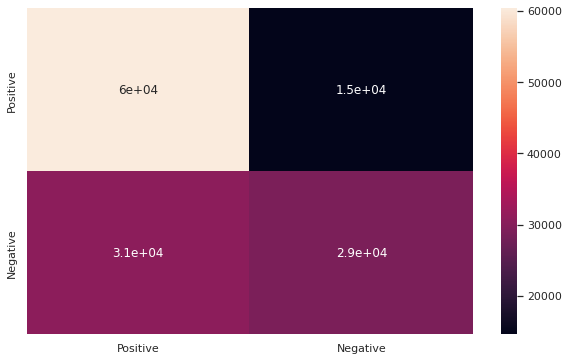

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73     74976
           1       0.67      0.49      0.56     59870

    accuracy                           0.66    134846
   macro avg       0.66      0.65      0.64    134846
weighted avg       0.66      0.66      0.65    134846



As seen from the confusion matrix generated from our final XGBoost model, The false positive rate (Type I error) was the lowest of the four categories, while the true positive rate was the highest. The accuracy score of our model was 0.663. For the Precision score, our model had a score of 0.66, which meant that our model was able to correctly predict the positive class 66 percent of the time. As for the Recall score, our model had a score of 0.65. 

0.6630378357533779
              precision    recall  f1-score   support

           0       0.66      0.81      0.73     74976
           1       0.67      0.49      0.56     59870

    accuracy                           0.66    134846
   macro avg       0.66      0.65      0.64    134846
weighted avg       0.66      0.66      0.65    134846



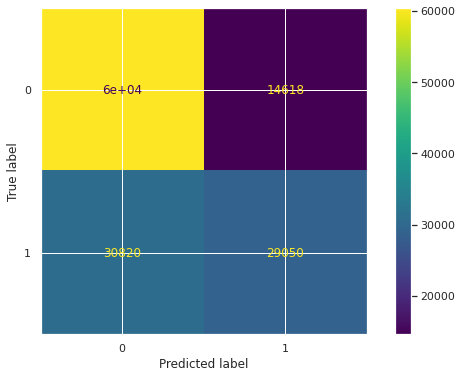

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def printResults(actual,predicted):
    print(accuracy_score(actual,predicted))
    print(classification_report(actual,predicted))
    m = confusion_matrix(actual,predicted)
    d = ConfusionMatrixDisplay(m)
    d.plot()

printResults(y_test,preds)

## 8. Conclusion

To conclude, we were able to derive insights about how different features of a flight will lead to a delay. For example, a flight is more likely to be delayed during the weekday, while flights at the start of a weekend have lower probability of being delayed. For airlines, Mesa Airline,Pacific Southwest Airline, or Airtran Airways have the lowest probability of having delayed flights. For time of the flight, Flights during the morning had a lower probability of delayed flights and after 2 pm the probability increases until 6pm. During the development of our models, one challenge that we faced was the computational time of our models. After we One-hot-encoded our categorical features, the dataset became too large that running our models was computationally ineffecient. We tried to resolve this problem by using a 10 percent sample of our dataset for our initial models and using the entire dataset only for our final model. 
 

